# Week 5 Exercise: German Credit Data 



## Step 1: Data Preprecessing

#### Q1. Given the background,  why would you create a decision tree model on this dataset?

In this step, you need to read the data, have an overview of the data, and perform label encoding for both the predictors and target variable.

1. first let's read the data.

##### code for reference:
import pandas as pd

credit = pd.read_csv("your path /credit.csv")

credit.head()

credit.shape

In [15]:
import pandas as pd

In [16]:
credit = pd.read_csv("D:/ASU Classes/CIS 508/credit.csv")

In [17]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,A152,1,A172,2,A191,no
3,A11,42,A32,A42,7882,A61,A74,2,4,45,A143,A153,1,A173,2,A191,no
4,A11,24,A33,A40,4870,A61,A73,3,4,53,A143,A153,2,A173,2,A191,yes


In [18]:
credit.shape

(1000, 17)

2. Then you need to perform label encoding for predictors.

##### code for reference:

X = pd.get_dummies(credit.iloc[ ,] , drop_first = True)


In [19]:
X = pd.get_dummies(credit.iloc[ :,0:16] , drop_first = True)

3. Then let's perform label encoding for the target variable.

##### code for reference 

from sklearn.preprocessing import LabelEncoder

labelencoder_credit = LabelEncoder()

y = labelencoder_credit.fit_transform(credit['target variable name here'].values)

In [20]:
from sklearn.preprocessing import LabelEncoder

labelencoder_credit = LabelEncoder()

y = labelencoder_credit.fit_transform(credit['default'].values)

4. Then let's split the data into training set and test set using 20% of the data (using random_state = 0).

##### code for reference
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Step 2: Build a Decision Tree

#### Q2. Perform a single decision tree model to predict customers’ default status. What is the performance accuracy of the decision tree model on the test set?

To answer this question, you will create a single decision tree model with default parameter values using **DecisionTreeClassifier** (set **random_state= 0**), and evaluate the decision tree model on the test set.


1.  first we build a decision tree model and apply it on the test set using **predict()**. We get the accuracy on the test set using **accuracy_score()**.

##### code for reference
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state = 0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

In [23]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state = 0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.680


2. we also evaluate the model performance on the test set using ROC curve with **plot_roc_curve()**.

##### code for reference

from sklearn import metrics 

from matplotlib import pyplot as plt

metrics.plot_roc_curve(tree, X_test, y_test) 

plt.show()

C:\Users\apere\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


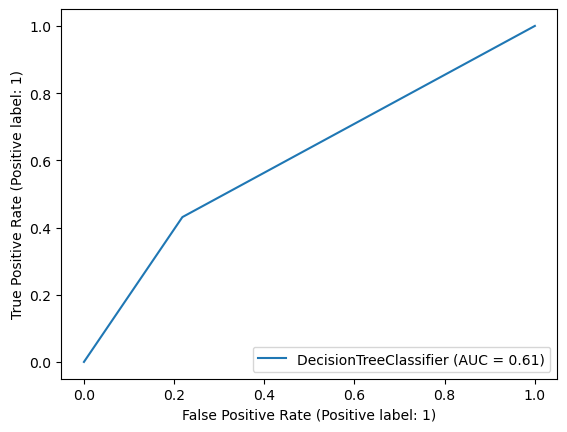

In [24]:
from sklearn import metrics

from matplotlib import pyplot as plt

metrics.plot_roc_curve(tree, X_test, y_test)

plt.show()

## Step 2: Cross Validation

#### Q3. What is the model accuracy of the decision tree model after performing the cross validation?

To answer this question, you need to performance cross validation using **cross_val_score**. Let's say we perform 5 fold cross validation.

##### code for reference

from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree, X, y, cv= 5)

print("Accuracy scores of each fold: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv= 5)

print("Accuracy scores of each fold: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Accuracy scores of each fold: [0.7   0.725 0.615 0.66  0.68 ]
Average cross-validation score: 0.68


## Step 4: Emsemble Methods
In this step you will perform serveral emsemble methods and improve the model performance.

### Emsemble Method 1: Bagging 

#### Q4. Develop a bagging model (with 100 decision trees) on the training set and evaluate the model using the test set. What is the model performance? 

To answer this question, you need to create a bagging model using **BaggingClassifier** (with **n_estimator = 100**, **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

1. First, create a bagging classifier using BaggingClassifer and apply it on the test set

##### code for reference

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=0)

bagging.fit(X_train, y_train)

y_bagging_pred = bagging.predict(X_test)

print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))


In [26]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=0)

bagging.fit(X_train, y_train)

y_bagging_pred = bagging.predict(X_test)

print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.770


2. Then we get the AUC for the bagging classifer using **plot_roc_curve**.

##### code for reference

metrics.plot_roc_curve(bagging, X_test, y_test)  

plt.show() 

C:\Users\apere\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


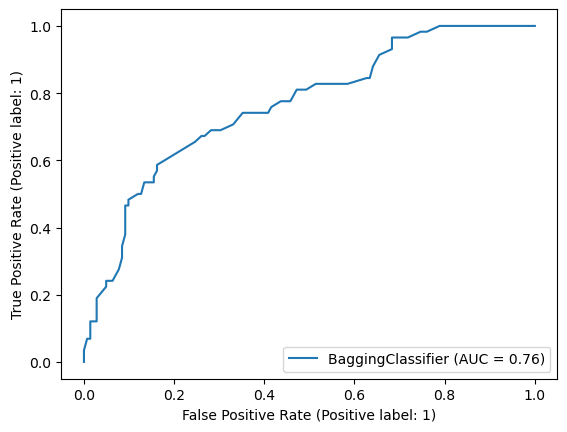

In [27]:
metrics.plot_roc_curve(bagging, X_test, y_test)

plt.show()

### Emsemble Method 2: Boosting

#### Q5. Develop a boosting model (with 100 decision trees) on the training set and evaluate the model using the test set. What is the model performance? 

To answer this question, you need to create a boosting model using **AdaBoostClassifier** (with **n_estimator = 100**,**random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

1. First, create a boosting classifier using AdaBoostClassifier() and apply it on the test set

##### code for reference

from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=100, random_state=0)

boost.fit(X_train, y_train)

y_boost_pred = boost.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test)))

In [33]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators=100, random_state=0)

boost.fit(X_train, y_train)

y_boost_pred = boost.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test)))

Accuracy on test set: 0.770


2. Then we get the AUC for the boosting classifer using **plot_roc_curve**.

C:\Users\apere\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


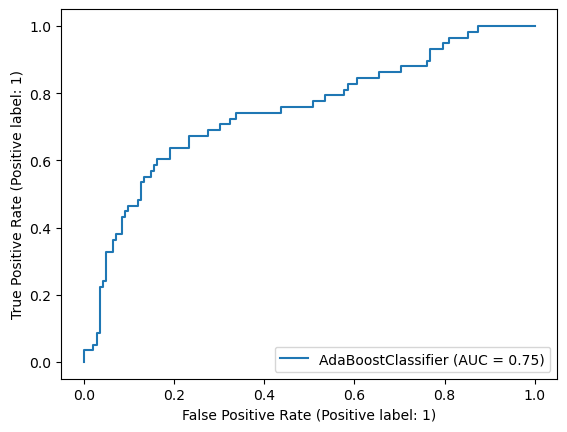

In [35]:
metrics.plot_roc_curve(boost, X_test, y_test)

plt.show()

### Emsemble Method 3: Random Forest

#### Q6. Develop a random forest model (with 100 decision trees) on the training set and evaluate the model using the test set. What is the model performance? 

To answer this question, you need to create a random forest model using **RandomForestClassifier** (with **n_estimator = 1000**, **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

1. First, create a random forest classifier using RandomForestClassifier() and apply it on the test set.

##### code for reference

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, random_state=0)

forest.fit(X_train, y_train)

y_rf_pred = forest.predict(X_test)

print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, random_state=0)

forest.fit(X_train, y_train)

y_rf_pred = forest.predict(X_test)

print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Random Forest Accuracy on test set: 0.765


2. Then we get the AUC for the random forest classifer using **plot_roc_curve**.

C:\Users\apere\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


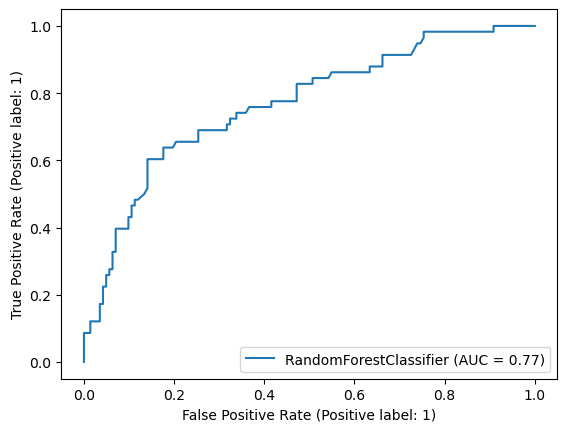

In [37]:
metrics.plot_roc_curve(forest, X_test, y_test)

plt.show()

#### Q7. Based on the random forest model, which of the following is the most important feature in predicting the target variable?


To answer this questio, you need to get the importance of each variable which have been saved in **feature_importance_**.

##### code for reference

importances = forest.feature_importances_

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

df = df.sort_values('importance')

print(df)



In [38]:
importances = forest.feature_importances_

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

df = df.sort_values('importance')

print(df)

                    feature  importance
21              purpose_A48    0.001737
15             purpose_A410    0.002645
18              purpose_A44    0.003130
19              purpose_A45    0.005668
25      savings_balance_A64    0.007269
31        other_credit_A142    0.009528
24      savings_balance_A63    0.009597
34             housing_A153    0.009988
20              purpose_A46    0.011386
23      savings_balance_A62    0.011644
22              purpose_A49    0.012295
12       credit_history_A33    0.012547
8      checking_balance_A13    0.012949
29  employment_duration_A74    0.014069
37                 job_A174    0.014574
14              purpose_A41    0.015595
35                 job_A172    0.015615
6                dependents    0.016054
30  employment_duration_A75    0.016573
16              purpose_A42    0.017283
11       credit_history_A32    0.017431
28  employment_duration_A73    0.018203
10       credit_history_A31    0.018878
36                 job_A173    0.018904


# Step 5: Grid Search

In this step we will improve the model’s performance by tuning its parameters.

#### Q8. Apply a hyperparameter tuning model using GridSearch algorithm on the training set and evaluate the model using the test set. What is the model performance??

To answer this question, use **GridSearchCV()** (set **random_state =0**)to tune the parameters in the decision tree model.The parameters we will tuned include: **criterion (gini or entropy)**, **max_leaf_nodes (ranges from 2 to 50)**, **max_depth(ranges from 3 to 15)**. In addition we perform cross validation as well.

1. first we define a combination of parameters and apply them to the decision tree model.

##### code for reference

import numpy as np

from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 50)), 'max_depth': np.arange(3, 15)}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv=10)

tree_grid.fit(X_train, y_train)

In [39]:
import numpy as np

from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 50)), 'max_depth': np.arange(3, 15)}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, cv=10)

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

#### Q9. What is the value of max_depth of the best model returned by hyperparameter tuning?

To answer this question, we can get the parameters of the best model using **best_estimator_** attribute.

##### code for reference

tree_grid.best_estimator_

In [40]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=17, random_state=0)

3. Then we apply this model on the test set and get the accuracy.

##### code for reference
y_pred_grid = tree_grid.predict(X_test)

print("Grid-search Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred_grid)))

In [42]:
y_pred_grid = tree_grid.predict(X_test)

print("Grid-search Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred_grid)))


Grid-search Model Accuracy on test set: 0.740


4. Lastly we visualize ROC curve and estimate the AUC value.

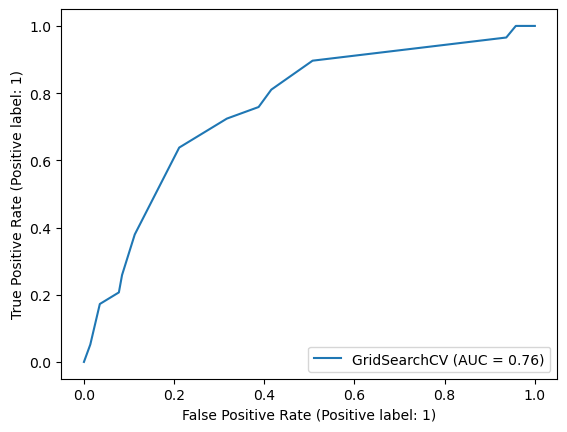

In [44]:
metrics.plot_roc_curve(tree_grid, X_test, y_test)

plt.show()

#### Q10. Which model performs the best (using AUC as the evaluation metric)?

To answer this question, you need to compare the models created and select the one with highest AUC.